### 共有150筆資料，分為三類(Setosa，Versicolour，Virginica)，
每類50筆資料，每個數據有四個屬性(花萼長度，花萼寬度，花瓣長度，花瓣寬度)

In [125]:
from sklearn.datasets import load_iris
from sklearn import svm   #svm支援向量機

In [126]:
iris_datasets=load_iris()    #載入資料

In [127]:
print(iris_datasets.DESCR)   #資料集詳細資訊

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [128]:
iris_datasets.feature_names   #特徵名稱

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [129]:
iris_datasets.target #150筆資料，0:Setosa，1:versicolor，3:virginica 種類名稱

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [130]:
iris_datasets.target_names  #種類名稱

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [131]:
iris_datasets.data.shape,iris_datasets.target.shape  #4代表四個特徵，target存放花的品種

((150, 4), (150,))

In [132]:
iris_datasets.data   #150筆資料，各四種特徵

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 資料預處理

In [133]:
from sklearn.model_selection import train_test_split   #將資料集隨機分成兩個部分train、test

In [134]:
x=iris_datasets.data     #存放四個特徵值
y=iris_datasets.target  #存放花的品種

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)  #開始分開資料

In [135]:
x_train.shape,x_test.shape      #訓練資料有112筆;測試資料有38筆，四個屬性

((112, 4), (38, 4))

In [136]:
x_train

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

In [137]:
y_train.shape,y_test.shape   #測試資料及訓練資料的標籤值(花品種)

((112,), (38,))

In [138]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [148]:
from keras.utils import np_utils    #label onehot coding轉換
y_label_train_onehot=np_utils.to_categorical(y_train)

In [149]:
y_label_test_onehot=np_utils.to_categorical(y_test)

In [168]:
y_label_train_onehot.shape

(112, 3)

In [173]:
y_label_test_onehot

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

## 建立模型

In [251]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [252]:
model = Sequential()

In [253]:
#加入輸入層&隱藏層
model.add(Dense(units=1000, 
                input_dim=4, 
                kernel_initializer='normal', 
                activation='relu'))

In [254]:
model.add(Dropout(0.5))

In [255]:
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

In [256]:
model.add(Dropout(0.5))

In [257]:
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))

In [258]:
model.add(Dropout(0.5))

In [259]:
#加入輸出層
model.add(Dense(units=3, 
                kernel_initializer='normal', 
                activation='softmax'))

In [260]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 3003      
Total para

## 訓練模型

In [261]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [284]:
train_history=model.fit(x=x_train,
                        y=y_label_train_onehot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 89 samples, validate on 23 samples
Epoch 1/10
 - 0s - loss: 0.1902 - acc: 0.8989 - val_loss: 0.2322 - val_acc: 0.8696
Epoch 2/10
 - 0s - loss: 0.2036 - acc: 0.9213 - val_loss: 0.2695 - val_acc: 0.8261
Epoch 3/10
 - 0s - loss: 0.2645 - acc: 0.8652 - val_loss: 0.3756 - val_acc: 0.8261
Epoch 4/10
 - 0s - loss: 0.1180 - acc: 0.9438 - val_loss: 0.4579 - val_acc: 0.8261
Epoch 5/10
 - 0s - loss: 0.1715 - acc: 0.9326 - val_loss: 0.4216 - val_acc: 0.8261
Epoch 6/10
 - 0s - loss: 0.1870 - acc: 0.9326 - val_loss: 0.2843 - val_acc: 0.8696
Epoch 7/10
 - 0s - loss: 0.1297 - acc: 0.9551 - val_loss: 0.1881 - val_acc: 0.9130
Epoch 8/10
 - 0s - loss: 0.1311 - acc: 0.9551 - val_loss: 0.1725 - val_acc: 0.9130
Epoch 9/10
 - 0s - loss: 0.1217 - acc: 0.9438 - val_loss: 0.2316 - val_acc: 0.8696
Epoch 10/10
 - 0s - loss: 0.1805 - acc: 0.9438 - val_loss: 0.2928 - val_acc: 0.8696


## 顯示訓練過程

In [285]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

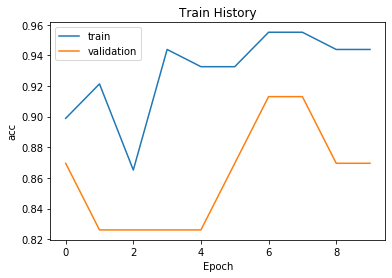

In [286]:
show_train_history(train_history,'acc','val_acc')

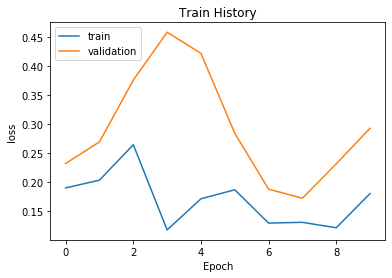

In [287]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [288]:
scores = model.evaluate(x_test, y_Test_OneHot)
print()
print('accuracy=',scores[1])

38/38 [==============================] - 0s 1ms/step

accuracy= 0.8947368389681766


## 進行預測

In [289]:
prediction=model.predict_classes(x_test)

In [290]:
prediction

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2], dtype=int64)

## 混淆矩陣

In [291]:
import pandas as pd
pd.crosstab(y_test,prediction,    #使用crosstab建立混淆矩陣
            rownames=['label'],colnames=['predict'])

predict,0,1,2
label,,,
0,13,0,0
1,0,12,4
2,0,0,9


In [292]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})   #建立真實值與預測值的dataframe
df[:2]

,label,predict
0,2,2
1,1,1


In [293]:
df[(df.label==1)&(df.predict==2)]   #找尋真實值是1，但預測是2的值

,label,predict
17,1,2
21,1,2
31,1,2
37,1,2
